<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek37.do.txt  -->
<!-- dom:TITLE: Exercises week 37 -->

# Exercises week 37
**Implementing gradient descent for Ridge and ordinary Least Squares Regression**

Date: **September 8-12, 2025**

## Simple one-dimensional second-order polynomial

We start with a very simple function

$$
f(x)= 2-x+5x^2,
$$

defined for $x\in [-2,2]$. You can add noise if you wish. 

We are going to fit this function with a polynomial ansatz. The easiest thing is to set up a second-order polynomial and see if you can fit the above function.
Feel free to play around with higher-order polynomials.

## Exercise 1, scale your data

Before fitting a regression model, it is good practice to normalize or
standardize the features. This ensures all features are on a
comparable scale, which is especially important when using
regularization. Here we will perform standardization, scaling each
feature to have mean 0 and standard deviation 1.

### 1a)

Compute the mean and standard deviation of each column (feature) in your design/feature matrix $\boldsymbol{X}$.
Subtract the mean and divide by the standard deviation for each feature.

We will also center the target $\boldsymbol{y}$ to mean $0$. Centering $\boldsymbol{y}$
(and each feature) means the model does not require a separate intercept
term, the data is shifted such that the intercept is effectively 0
. (In practice, one could include an intercept in the model and not
penalize it, but here we simplify by centering.)
Choose $n=100$ data points and set up $\boldsymbol{x}, $\boldsymbol{y}$ and the design matrix $\boldsymbol{X}$.

In [129]:
import numpy as np

n = 100

x = np.linspace(-2, 2, n)

y = 2 - x  + 5 * x**2 + np.random.normal(0, 0.1,n)



def polynomial_features(x, p, intercept=False):
    n = len(x)
    if intercept:
        X = np.zeros((n, p + 1))
        for i in range(0,p+1):
                X[:,i] = x**i
        return X

    X = np.zeros((n, p))
    for i in range(0,p):
            X[:,i] = x**(i+1)
    return X

    
X = polynomial_features(x, 2)


# Standardize features (zero mean, unit variance for each feature)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  # safeguard to avoid division by zero for constant features
X_norm = (X - X_mean) / X_std

# Center the target to zero mean (optional, to simplify intercept handling)
y_mean = y.mean()
y_centered = y - y_mean


#We should center the y-values as we do not have an intercept column in X.



Fill in the necessary details. Do we need to center the $y$-values? 

After this preprocessing, each column of $\boldsymbol{X}_{\mathrm{norm}}$ has mean zero and standard deviation $1$
and $\boldsymbol{y}_{\mathrm{centered}}$ has mean 0. This makes the optimization landscape
nicer and ensures the regularization penalty $\lambda \sum_j
\theta_j^2$ in Ridge regression treats each coefficient fairly (since features are on the
same scale).

## Exercise 2, calculate the gradients

Find the gradients for OLS and Ridge regression using the mean-squared error as cost/loss function.

**Solution:**

For OLS the cost function is given by 

$$
C(\beta) = \frac{1}{n} \Vert y - X \beta  \Vert^2.
$$

While for Ridge the cost function is given by 

$$
C_{\text{Ridge}} (\beta) = \frac{1}{n} \Vert y - X \beta \Vert^2 + \lambda \vert  \beta \vert^2.
$$

In the exercises from last week, we found that 

$$
\frac{\partial \Vert y - X \beta  \Vert^2  }{\partial \beta} = - 2 (y - X \beta)^T X
$$

and  

$$
\frac{\partial \Vert y - X \beta  \Vert^2 + \lambda \Vert \beta \Vert^2 }{\partial \beta} = - 2 (y - X \beta)^T X + 2 \lambda \beta^T.
$$

Thus, when swapping to a column vector and swapping the order of the difference, we find that OLS and Ridge gradients are given by 

$$
\nabla C(\beta) = \frac{2}{n} ( X^T (X \beta - y))
$$

and

$$
\nabla C_{\text{Ridge}}(\beta) = 2(\frac{1}{n}  X^T (X \beta - y) + \lambda \beta).
$$



## Exercise 3, using the analytical formulae for OLS and Ridge regression to find the optimal paramters $\boldsymbol{\theta}$

In [130]:
# Set regularization parameter, either a single value or a vector of values
# Note that lambda is a python keyword. The lambda keyword is used to create small, single-expression functions without a formal name. These are often called "anonymous functions" or "lambda functions."

lam = 0.01

n_features = X_norm.shape[1]


# Analytical form for OLS and Ridge solution: theta_Ridge = (X^T X + lambda * I)^{-1} X^T y and theta_OLS = (X^T X)^{-1} X^T y
I = np.eye(n_features)
lam = 0.01
theta_closed_formRidge = np.linalg.pinv(X_norm.T @ X_norm + lam * I) @ (X_norm.T @ y_centered)
theta_closed_formOLS = np.linalg.pinv(X_norm.T @ X_norm) @ (X_norm.T @ y_centered)

print("Closed-form Ridge coefficients:", theta_closed_formRidge)
print("Closed-form OLS coefficients:", theta_closed_formOLS)

Closed-form Ridge coefficients: [-1.16815283  6.07965364]
Closed-form OLS coefficients: [-1.16826964  6.0802616 ]


This computes the Ridge and OLS regression coefficients directly. The identity
matrix $I$ has the same size as $X^T X$. It adds $\lambda$ to the diagonal of $X^T X$ for Ridge regression. We
then invert this matrix and multiply by $X^T y$. The result
for $\boldsymbol{\theta}$  is a NumPy array of shape (n$\_$features,) containing the
fitted parameters $\boldsymbol{\theta}$.

### 3a)

Finalize, in the above code, the OLS and Ridge regression determination of the optimal parameters $\boldsymbol{\theta}$.

### 3b)

Explore the results as function of different values of the hyperparameter $\lambda$. See for example exercise 4 from week 36.

Ridge MSE: {-5: 0.008537435097250185, -4: 0.008537435135201197, -3: 0.008537438930233681, -2: 0.00853781836456052, -1: 0.008575692977951223, 0: 0.012295344625781248, 1: 0.3253509483568513, 2: 9.592146211211437, 3: 31.689888761095457, 4: 37.58763272424332, 5: 38.266418519505265}
OLS MSE: 0.00853743509686684


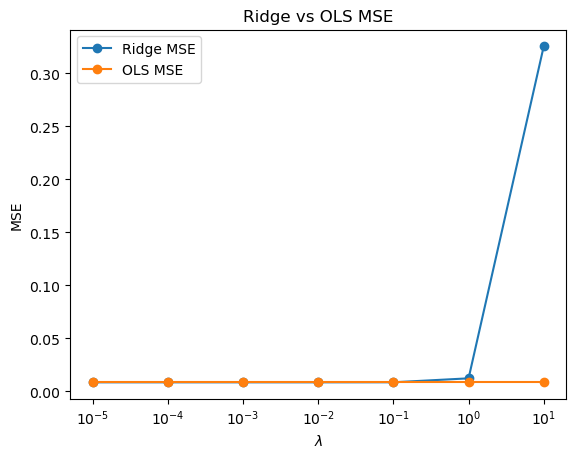

In [131]:
#Problem 3b)

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


def Ridge_parameters(X, y, l=0):
    # Assumes X is scaled and has no intercept column
    I = np.eye(X.shape[1])
    return np.linalg.pinv(X.T @ X + l * I) @ X.T @ y



def OLS_parameters(X, y):
    beta = np.linalg.pinv(X.T @ X) @ X.T @ y
    return beta

OLS_beta = OLS_parameters(X_norm , y_centered)

pred_OLS = X_norm @ OLS_beta 

OLS_mse_value = mean_squared_error(y_centered , pred_OLS) 

ridge_mse = {}
OLS_mse = {}


for t in range(-5,6):

    Ridge_beta = Ridge_parameters(X_norm, y_centered, 10**(t))

    pred_ridge = X_norm @ Ridge_beta 
    
    ridge_mse[t] = mean_squared_error(y_centered , pred_ridge)

    OLS_mse[t] = OLS_mse_value


print("Ridge MSE:" , ridge_mse)
print("OLS MSE:", OLS_mse_value)


orders = np.arange(-5, 2)   

magnitudes = list(range(-5, 2))
plt.figure()
plt.plot([rf'$10^{{{e}}}$' for e in orders], [ridge_mse[d] for d in magnitudes], marker="o", label="Ridge MSE")
plt.plot([rf'$10^{{{e}}}$' for e in orders], [OLS_mse[d]  for d in magnitudes], marker='o', label="OLS MSE")
plt.xlabel("$\lambda$")
plt.ylabel("MSE")
plt.legend(); plt.title("Ridge vs OLS MSE")
plt.show()



## Exercise 4, Implementing the simplest form for gradient descent

Alternatively, we can fit the ridge regression model using gradient
descent. This is useful to visualize the iterative convergence and is
necessary if $n$ and $p$ are so large that the closed-form might be
too slow or memory-intensive. We derive the gradients from the cost
functions defined above. Use the gradients of the Ridge and OLS cost functions with respect to
the parameters  $\boldsymbol{\theta}$ and set up (using the template below) your own gradient descent code for OLS and Ridge regression.

Below is a template code for gradient descent implementation of ridge:

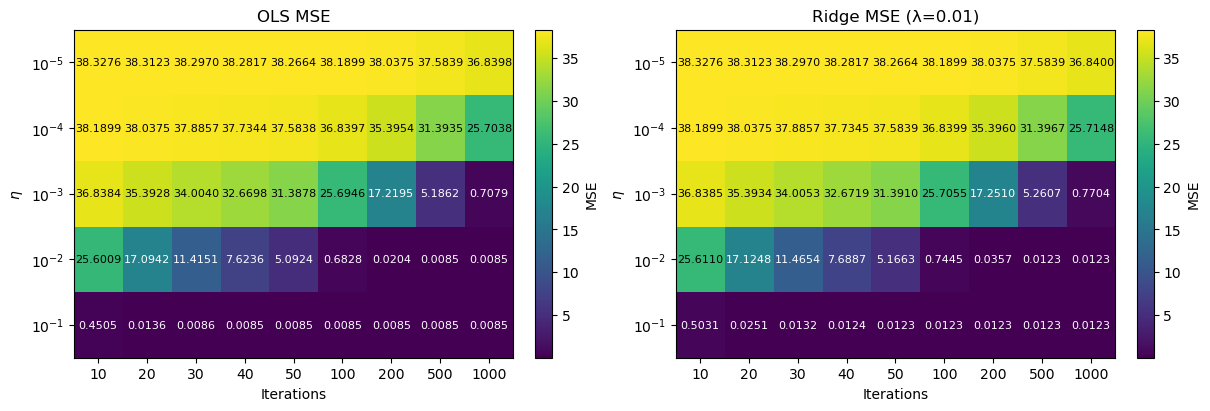

In [132]:
"""
I solve problem a) by creating a heatmap that compares OLS across learning rates and number of iterations. I also compared with Ride regression.

I reused most of the code for the heatmap last week,
where I got help from ChatGPT with debugging of the heatmap plotting code and the 
customization of the heatmap. Such as formatting the MSE in the cells and 
sharing the color scale across the heatmaps. 

 We see that that having a lower learning rate is detrimental in this experiment. We also see that our theta converges quite fast, after only about 30 iterations for OLS and 40 iterations for Ridge. 
"""


#Defining a function that works for both ridge and OLS, by setting lambda to zero by default.
def Gradient(X,y,theta,lam = 0):
    return (2.0/n) * (X.T @ (X @ theta - y)) + 2.0 * lam * theta



#Defining a function for gradient descent
def Gradient_Descent(eta, num_iters,lam = 0):
    #Setting a starting theta
    theta = np.zeros(n_features)  
 
    # Gradient descent loop
    for t in range(num_iters):
        g = Gradient(X_norm, y_centered, theta,lam)
        theta = theta - eta * g
      
    return theta

iterations_list = np.array([10, 20, 30, 40, 50, 100, 200, 500, 1000])
orders = -np.arange(1, 6)                 
etas = 10.0**orders                         


mse_OLS   = np.zeros((len(etas), len(iterations_list)))
mse_Ridge = np.zeros((len(etas), len(iterations_list)))


for i, eta in enumerate(etas):
    for j, num_iters in enumerate(iterations_list):
        #OLS
        theta_ols = Gradient_Descent(eta, int(num_iters))
        pred_ols = X_norm @ theta_ols
        mse_OLS[i, j] = np.mean((y_centered - pred_ols)**2)

        # Ridge with lambda = 0.01
        theta_r = Gradient_Descent(eta, int(num_iters), lam=0.01)
        pred_ridge = X_norm @ theta_r
        mse_Ridge[i, j] = np.mean((y_centered - pred_ridge)**2)


fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# share color scale across both heatmaps
vmin = np.minimum(mse_OLS.min(), mse_Ridge.min())
vmax = np.maximum(mse_OLS.max(), mse_Ridge.max())

for ax, Z, title in zip(axes,[mse_OLS, mse_Ridge],["OLS MSE", f"Ridge MSE (λ={0.01})"]):

    im = ax.imshow(Z, origin="lower", aspect="auto", vmin=vmin, vmax=vmax, cmap="viridis")

    # numbers inside cells 
    th = 0.5 * (Z.min() + Z.max())
    for r in range(Z.shape[0]):
        for c in range(Z.shape[1]):
            ax.text(c, r, f"{Z[r, c]:.4f}", ha="center", va="center",
                    color="black" if Z[r, c] > th else "white", fontsize=8)

    ax.set_xticks(np.arange(len(iterations_list)))
    ax.set_xticklabels([str(k) for k in iterations_list])
    ax.set_xlabel("Iterations")
    ax.set_yticks(np.arange(len(etas)))
    ax.set_yticklabels([f"$10^{{{e}}}$" for e in orders])
    ax.set_ylabel("$\eta$")
    ax.set_title(title)
    fig.colorbar(im, ax=ax, label="MSE")


plt.show()



(array([-1.15670262,  6.02006099]), 94)


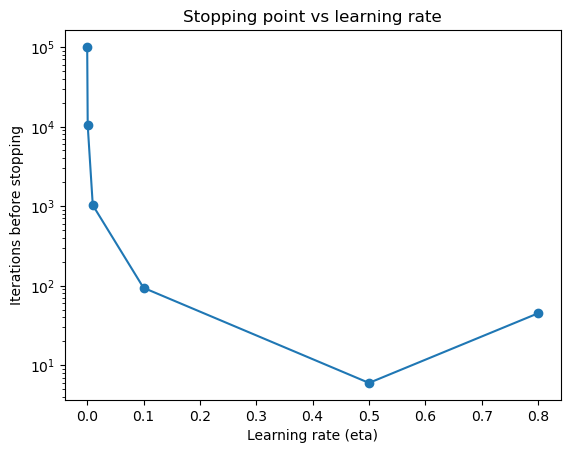

In [133]:
#Problem 4b)

#I define the stopping parameter epsilon as 10**(-8). 

def stopping_parameter(grad, epsilon = 10**(-8)):
    if np.linalg.norm(grad) < epsilon: return True


#Defining a new Gradient descent function that includes the stopping parameter. 
def Gradient_Descent(eta, num_iters,lam = 0):
    #Setting a starting theta
    theta = np.zeros(n_features)  
    counter = 0
 
    # Gradient descent loop
    for t in range(num_iters):
       
        if t != 0: 
            if stopping_parameter(g): break 
        
        counter += 1

        g = Gradient(X_norm, y_centered, theta,lam)
        theta = theta - eta * g
      
    return theta, counter


print(Gradient_Descent(0.1,10000, lam = 0.01))


#We see that with the chosen learning rate of 0.1, the stopping parameter function stops iterating at 94.


#I also plotted how the amount of iterations before stopping varies depending on choice of learning rate. As expected, we see that a smaller learning rate requires more iterations. 


etas = [0.0001, 0.001, 0.01, 0.1, 0.5, 0.8]   
stopping_points = []

for eta in etas:
    _, counter = Gradient_Descent(eta, 100000, lam=0.01)
    stopping_points.append(counter)

plt.plot(etas, stopping_points, marker="o")  
plt.yscale("log")
plt.xlabel("Learning rate (eta)")
plt.ylabel("Iterations before stopping")
plt.title("Stopping point vs learning rate")
plt.show()




### 4a)

Write first a gradient descent code for OLS only using the above template.
Discuss the results as function of the learning rate parameters and the number of iterations

### 4b)

Write then a similar code for Ridge regression using the above template.
Try to add a stopping parameter as function of the number iterations and the difference between the new and old $\theta$ values. How would you define a stopping criterion?

## Exercise 5, Ridge regression and a new Synthetic Dataset

We create a synthetic linear regression dataset with a sparse
underlying relationship. This means we have many features but only a
few of them actually contribute to the target. In our example, we’ll
use 10 features with only 3 non-zero weights in the true model. This
way, the target is generated as a linear combination of a few features
(with known coefficients) plus some random noise. The steps we include are:

Decide on the number of samples and features (e.g. 100 samples, 10 features).
Define the **true** coefficient vector with mostly zeros (for sparsity). For example, we set $\hat{\boldsymbol{\theta}} = [5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0]$, meaning only features 0, 1, and 6 have a real effect on y.

Then we sample feature values for $\boldsymbol{X}$ randomly (e.g. from a normal distribution). We use a normal distribution so features are roughly centered around 0.
Then we compute the target values $y$ using the linear combination $\boldsymbol{X}\hat{\boldsymbol{\theta}}$ and add some noise (to simulate measurement error or unexplained variance).

Below is the code to generate the dataset:

In [ ]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Define dataset size
n_samples = 100
n_features = 10

# Define true coefficients (sparse linear relationship)
theta_true = np.array([5.0, -3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0])

# Generate feature matrix X (n_samples x n_features) with random values
X = np.random.randn(n_samples, n_features)  # standard normal distribution

# Generate target values y with a linear combination of X and theta_true, plus noise
noise = 0.5 * np.random.randn(n_samples)    # Gaussian noise
y = X @ theta_true + noise


#Defining another Gradient descent function adapted to this problem. 

def Gradient_Descent(eta, num_iters, dimension, lam = 0):
    #Setting a starting theta
    theta = np.zeros(dimension)  
    counter = 0
 
    # Gradient descent loop
    for t in range(num_iters):
       
        if t != 0: 
            if stopping_parameter(g): break 
        
        counter += 1

        g = Gradient(X, y, theta,lam)
        theta = theta - eta * g
      
    return theta, counter

#Defining a new parameter function that has lambda set to zero by default, and by adding a lambda we get Ridge parameters.

def Ridge_parameters(X, y, l=0):
    # Assumes X is scaled and has no intercept column
    I = np.eye(X.shape[1])
    return np.linalg.pinv(X.T @ X + l * I) @ X.T @ y


GD_OLS = (Gradient_Descent(0.1 , 1000, 10))[0]
GD_ridge = (Gradient_Descent(0.1, 1000, 10, 0.01))[0]
Closed_OLS = Ridge_parameters(X, y)
Closed_ridge = Ridge_parameters(X,y,0.01)

print("Gradient descent OLS (Eta = 0.1):" , GD_OLS)
print("Gradient descent Ridge (Eta = 0.1 , lambda = 0.01):" , GD_ridge)
print("Analytical OLS" , Closed_OLS)
print("Analytical Ridge (lambda = 0.01):" , GD_OLS)



""""
 We see from the output that all of the methods give fairly good result, although we see that the Ridge gradient descent does slightly worse than rest of the methods. 
"""





Gradient descent OLS (Eta = 0.1): [ 5.00905318e+00 -3.00383337e+00 -1.62718288e-02  1.44819821e-01
 -7.16006531e-02 -4.29656408e-02  2.05558116e+00  1.97583671e-03
  4.11922235e-02 -5.10225175e-02]
Gradient descent Ridge (Eta = 0.1 , lambda = 0.01): [ 4.96007554e+00 -2.96288014e+00 -1.66162180e-02  1.51234402e-01
 -8.08028061e-02 -5.09067583e-02  2.02863363e+00  4.83615773e-03
  3.16609932e-02 -5.16768733e-02]
Analytical OLS [ 5.00905318e+00 -3.00383337e+00 -1.62718294e-02  1.44819819e-01
 -7.16006510e-02 -4.29656382e-02  2.05558117e+00  1.97583716e-03
  4.11922237e-02 -5.10225177e-02]
Analytical Ridge (lambda = 0.01): [ 5.00905318e+00 -3.00383337e+00 -1.62718288e-02  1.44819821e-01
 -7.16006531e-02 -4.29656408e-02  2.05558116e+00  1.97583671e-03
  4.11922235e-02 -5.10225175e-02]


'"\n We see from the output that all of the methods give fairly good result, although e see that the Ridge gradient descent does slightly worse than rest of the methods. \n'

This code produces a dataset where only features 0, 1, and 6
significantly influence $\boldsymbol{y}$. The rest of the features have zero true
coefficient. For example, feature 0 has
a true weight of 5.0, feature 1 has -3.0, and feature 6 has 2.0, so
the expected relationship is:

$$
y \approx 5 \times x_0 \;-\; 3 \times x_1 \;+\; 2 \times x_6 \;+\; \text{noise}.
$$

You can remove the noise if you wish to. 

Try to fit the above data set using OLS and Ridge regression with the analytical expressions and your own gradient descent codes.

If everything worked correctly, the learned coefficients should be
close to the true values [5.0, -3.0, 0.0, …, 2.0, …] that we used to
generate the data. Keep in mind that due to regularization and noise,
the learned values will not exactly equal the true ones, but they
should be in the same ballpark.  Which method (OLS or Ridge) gives the best results?